# INTRODUCTION

The Dataset used for investigation is the TMDb movie data.
The dataset consists of 
        Rows:10866(without headers)
        Columns:21
The questions to be answered are:
        * How the runtime and revenues have varied over time?
        * Runtime of most of the movies over the years
        * The most profitable actors and profitable production companies.
        * How many of each actors movie had released?
        * How many of each genres had released?
        * Popular genre and profitable genre
        * The most and least popular movie
        * The most and least profitable movie
Trends to be explored in the dataset:
        * Runtime variation over the years
        * Revenue variation over the years
        * profit variation over the years
        * popularity variation over the years

## __Data Wrangling__

We check for duplicate entries and remove them,try to remove the data entries without any entries or null values.
Has removed the entries of overview,tagline,homepage,keywords as these seemed to be irrelevant for the analysis.Rows with null values of imdb_id has also been removed.There are rows with value 0 as budget,revenue,runtime these has also been removed.

In [1]:
#import statements for packages to be used
import csv # read and write csv files
import pandas as pd
import numpy as np
from datetime import datetime # operations to parse dates
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
## Read the csv file for analysing
## the csv file is loaded into md or movie_data
md = pd.read_csv('tmdb-movies.csv')
print(md.head()) #to verify if the data has been read
print("No of duplicates {}".format(md.duplicated().sum())) ## checking for duplicates
print(md.info())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [3]:
md.shape #number of rows and columns

(10866, 21)

In [4]:
## Removed the overview,tagline,homepage
## columns as these are not needed for us.

def condense_data(pandaData):
    pandaData.drop(['overview'],axis=1,inplace = True)
    pandaData.drop(['tagline'],axis=1,inplace = True)
    pandaData.drop(['homepage'],axis=1,inplace = True)
    pandaData.drop(['keywords'],axis=1,inplace = True)
    pandaData.drop_duplicates(inplace=True) # Remove duplicate rows

In [5]:
condense_data(md)
print(md.head())
print(md.info())  ## to check if duplicates are removed
print("No of duplicates {}".format(md.duplicated().sum()))

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         Jam

We see that the number of duplicate entries has become 0 and was able to remove the columns tagline,overview,homepage,keywords.

In [6]:
## Checking for null values
md.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We see that we have null values in certain columns only. The imdb_id is relevant to us as it is the unique id which distinguishes all these movies,the remaining columns with null values are not of interest to us in this analysis. So we remove the rows with null values of imdb_id  

In [7]:
md.dropna(subset=['imdb_id'], inplace=True)## drop rows with null value of imdb_id
md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 17 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
director                10815 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              10855 non-null float64
revenue_adj             10855 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.5+ MB


We see that the number of entries for every column has reduced by a number.

We also remove the rows with value as 0 for budget,revenue,runtime as these can produce noise in our analysis. 

In [8]:
# replace 0 with Nan
md['revenue'] = md['revenue'].replace(0,np.NaN)
md['budget'] = md['budget'].replace(0,np.NaN)
md['runtime'] = md['runtime'].replace(0,np.NaN)

In [9]:
# drop rows having null value in columns revenue,budget,runtime
md.dropna(subset =['revenue'],inplace=True)
md.dropna(subset =['budget'],inplace=True)
md.dropna(subset =['runtime'],inplace=True)
md.dropna(subset =['production_companies'],inplace=True)
md.dropna(subset =['cast'],inplace=True) ## also removed null values of cast and production companies as these are used 
md.info()                                ## in our analysis.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 10848
Data columns (total 17 columns):
id                      3806 non-null int64
imdb_id                 3806 non-null object
popularity              3806 non-null float64
budget                  3806 non-null float64
revenue                 3806 non-null float64
original_title          3806 non-null object
cast                    3806 non-null object
director                3805 non-null object
runtime                 3806 non-null float64
genres                  3806 non-null object
production_companies    3806 non-null object
release_date            3806 non-null object
vote_count              3806 non-null int64
vote_average            3806 non-null float64
release_year            3806 non-null int64
budget_adj              3806 non-null float64
revenue_adj             3806 non-null float64
dtypes: float64(7), int64(3), object(7)
memory usage: 535.2+ KB


After the data wrangling phase we have only 3806 entries with 17 columns. We do our analysis on the dataframe obtained after cleaning.

In [10]:
## checking if there are any more null values
md.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                1
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

We see that we have a null value in director column but since we are not doing analysis on directors we don't remove the row.

In [11]:
# save into a new clean dataset for ease of analysis
# we will use this dataset for analysis
md.to_csv('movie_tmdb.csv', index=False)

# Data Exploration 

In [12]:
# reading data from the new cleaned dataset

md_tmdb = pd.read_csv('movie_tmdb.csv')
md_tmdb.info() # to  verify if the data read is same as 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3806 entries, 0 to 3805
Data columns (total 17 columns):
id                      3806 non-null int64
imdb_id                 3806 non-null object
popularity              3806 non-null float64
budget                  3806 non-null float64
revenue                 3806 non-null float64
original_title          3806 non-null object
cast                    3806 non-null object
director                3805 non-null object
runtime                 3806 non-null float64
genres                  3806 non-null object
production_companies    3806 non-null object
release_date            3806 non-null object
vote_count              3806 non-null int64
vote_average            3806 non-null float64
release_year            3806 non-null int64
budget_adj              3806 non-null float64
revenue_adj             3806 non-null float64
dtypes: float64(7), int64(3), object(7)
memory usage: 505.6+ KB


## _Runtime and Revenue variation_ ##

    * We wanted to check how runtime and revenues varied over time
    * We wish to find the most common run time
Since we are interested in variations over time we group the entries by the year,have used histogram and line graphs for the visualisation.

In [13]:
##We use md_new frame to find variations over the year
md_new = md_tmdb.groupby('release_year').mean()
md_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1960 to 2015
Data columns (total 9 columns):
id              56 non-null float64
popularity      56 non-null float64
budget          56 non-null float64
revenue         56 non-null float64
runtime         56 non-null float64
vote_count      56 non-null float64
vote_average    56 non-null float64
budget_adj      56 non-null float64
revenue_adj     56 non-null float64
dtypes: float64(9)
memory usage: 4.4 KB


We see that we are dealing with data from 56 years, we have grouped the entries by year.

In [14]:
## Answering the questioning mathematically
md_new['runtime'].describe()

count     56.000000
mean     114.930985
std       12.162861
min      103.304348
25%      107.894561
50%      109.961253
75%      118.346154
max      167.600000
Name: runtime, dtype: float64

The mean of runtime over the years has been between 114 and 115 minutes.

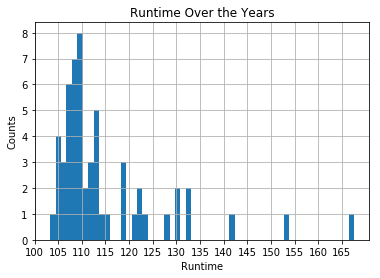

In [15]:
md_new['runtime'].hist(bins = 56)
plt.xlabel('Runtime')
plt.ylabel('Counts') # the number of times the duration has occured over the years 
plt.xticks(np.arange(100,170,step=5))
plt.title('Runtime Over the Years');

We see that the distribution is right skewed,most of the runtimes were in between 107 & 109.

We'd like to know what revenue will a movie generate,is there a typical revenue generated.

count    5.600000e+01
mean     8.310753e+07
std      3.534136e+07
min      1.694734e+07
25%      5.571929e+07
50%      8.951281e+07
75%      1.081116e+08
max      1.637683e+08
Name: revenue, dtype: float64

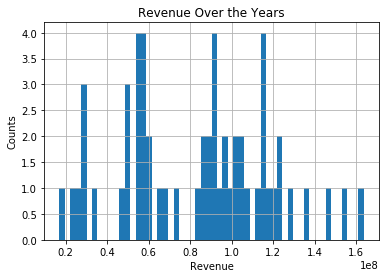

In [16]:
md_new['revenue'].hist(bins=56)
plt.xlabel('Revenue')
plt.ylabel('Counts') # the number of times the revenue was generated over the years 
plt.title('Revenue Over the Years');
md_new['revenue'].describe()

Revenues vary widely,Most movie revenues fall in the 0.8e+07 to 1.0e+08 ranges.Mean of Revenues over the years:8.31e+07

In [16]:
popularity_list = list(md_new['popularity'])

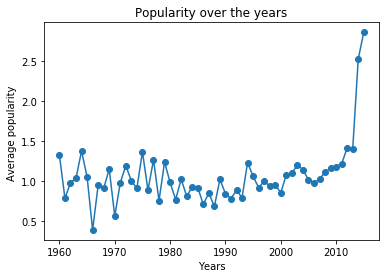

In [17]:
#plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=1)
#plt.plot( 'x', 'y2', data=df, marker='', markerfacecolor='olive', linewidth=1)
plt.xlabel('Years')
plt.ylabel('Average popularity ')
plt.title('Popularity over the years')
plt.plot(np.arange(md['release_year'].min(),md['release_year'].max()+1,1),popularity_list , marker='o')

The popularity of the movies released after 2012 were high and the popularity grew like anything and over the years popularity has increased for movies but it remained more or less stable till 2012 and the year 1967 saw the least popularity.The popularity of movies released in 2015 were the highest.


### Genres of movie released

In [18]:
genre_list = [] 
genre_pd = md_tmdb['genres']
for row in genre_pd:
    genre_list += str(row).split('|')
genre_list = list(set(genre_list))

In [19]:
print(genre_list)
len(genre_list)

['Adventure', 'Fantasy', 'Documentary', 'Foreign', 'Science Fiction', 'Crime', 'Family', 'Horror', 'War', 'TV Movie', 'Action', 'Drama', 'Romance', 'Thriller', 'History', 'Comedy', 'Western', 'Music', 'Animation', 'Mystery']


20

Movies released during the years were of 20 different genres. 

In [20]:
# this function extracts data from a particular column
def extract_data(column_name,framename):
    extracted_data = framename[column_name].str.cat(sep = '|') # the data in string is seperated by |
    #giving pandas series and storing the values separately
    extracted_data = pd.Series(extracted_data.split('|'))
    count = extracted_data.value_counts()
    return count

To find how many of each genres were released

Drama              1730
Comedy             1336
Thriller           1194
Action             1076
Adventure           743
Romance             659
Crime               649
Science Fiction     517
Horror              459
Family              417
Fantasy             395
Mystery             343
Animation           199
Music               131
History             128
War                 119
Western              52
Documentary          26
Foreign              10
TV Movie              1
dtype: int64


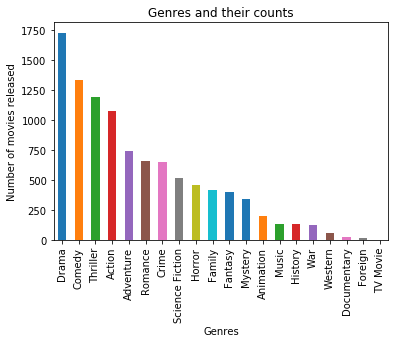

In [21]:
genre_count = extract_data('genres',md)
print(genre_count)
plt.ylabel('Number of movies released')
plt.xlabel('Genres')
plt.title('Genres and their counts')
genre_count.plot.bar()

From the visualisation we see that most of the movies released during the time period were of Drama and Comedy genres, and the least released were Foreign and Tv Movie genres.

## Popular movie

In [22]:
most_popular = md.loc[md['popularity'].idxmax()]
least_popular = md.loc[md['popularity'].idxmin()]
print("Most popular movie- {} with rating {}".format(most_popular.original_title,most_popular.popularity))
print("Least popular movie- {} with rating {}".format(least_popular.original_title,least_popular.popularity))

Most popular movie- Jurassic World with rating 32.985763
Least popular movie- Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´ with rating 0.010334999999999999


0                              Jurassic World
1                          Mad Max: Fury Road
629                              Interstellar
630                   Guardians of the Galaxy
2                                   Insurgent
631       Captain America: The Winter Soldier
1329                                Star Wars
632                                 John Wick
3                Star Wars: The Force Awakens
633     The Hunger Games: Mockingjay - Part 1
Name: original_title, dtype: object
Drama              1730
Comedy             1336
Thriller           1194
Action             1076
Adventure           743
Romance             659
Crime               649
Science Fiction     517
Horror              459
Family              417
Fantasy             395
Mystery             343
Animation           199
Music               131
History             128
War                 119
Western              52
Documentary          26
Foreign              10
TV Movie              1
dtype: int64


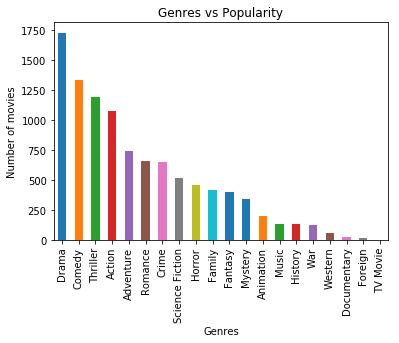

In [23]:
## Here we are considering only the first 5000 popular movies
popular_top = md.nlargest(5000,'popularity')
popular_genre = extract_data('genres',popular_top)
print(popular_top.head(10).original_title) ## names of the 10 most popular movies
print(popular_genre)
plt.ylabel('Number of movies')
plt.xlabel('Genres')
plt.title('Genres vs Popularity')
popular_genre.plot.bar()

Drama and Comedy were the most popular movie genres.

## Profitable movies

In [24]:
## inserting a new column for finding profit of each movie
md_tmdb.insert(5,'profit',md_tmdb['revenue']-md_tmdb['budget'],allow_duplicates=False) #here 5 is the insert position
md_tmdb.insert(6,'profit_adj',md_tmdb['revenue_adj']-md_tmdb['budget_adj'],allow_duplicates=False) #here 6 is the insert position

In [25]:
#print(md_tmdb.head())
print('Most profitable movie- {}'.format(md_tmdb.loc[md_tmdb['profit'].idxmax()].original_title))
print('Least profitable movie- {}'.format(md_tmdb.loc[md_tmdb['profit'].idxmin()].original_title))
print('Most profitable movie(adj)- {}'.format(md_tmdb.loc[md_tmdb['profit_adj'].idxmax()].original_title))
print('Least profitable movie(adj)- {}'.format(md_tmdb.loc[md_tmdb['profit_adj'].idxmin()].original_title))

Most profitable movie- Avatar
Least profitable movie- The Warrior's Way
Most profitable movie(adj)- Star Wars
Least profitable movie(adj)- The Warrior's Way


We find that the most profitable movie is 'Avatar' and the least profitable one is 'The Warriors Way'. When adjusted with inflation 'Star Wars' becomes the most profitable movie.

We do a genres check of the first 5000 profitable movies released during the time period. 

344                                           Avatar
3                       Star Wars: The Force Awakens
1747                                         Titanic
0                                     Jurassic World
4                                          Furious 7
1469                                    The Avengers
1089    Harry Potter and the Deathly Hallows: Part 2
14                           Avengers: Age of Ultron
1837                                          Frozen
2829                                         The Net
Name: original_title, dtype: object
Drama              1730
Comedy             1336
Thriller           1194
Action             1076
Adventure           743
Romance             659
Crime               649
Science Fiction     517
Horror              459
Family              417
Fantasy             395
Mystery             343
Animation           199
Music               131
History             128
War                 119
Western              52
Documentary          26
Fo

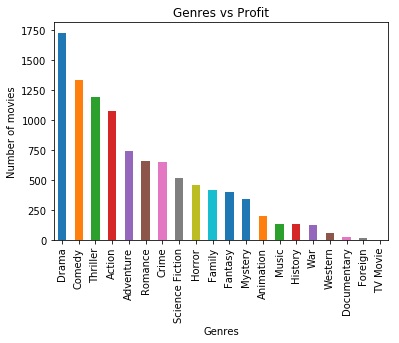

In [26]:
#the first 5000 profitable movies
profitable_top = md_tmdb.nlargest(5000,'profit')
profitable_genre = extract_data('genres',profitable_top)
print(profitable_top.head(10).original_title) ## the 10 most profitable movies
print(profitable_genre)
plt.ylabel('Number of movies')
plt.xlabel('Genres')
plt.title('Genres vs Profit')
profitable_genre.plot.bar()

We see that both popular genres and most profitable movies genres gives almost the same visualisation and mathematical output.This creates a doubt on whether there is any correlation between popular genres and profitable genres. We check for the popularity vs profit dependency.

In [27]:
md_new.insert(5,'profit',md_new['revenue']-md_new['budget'],allow_duplicates=False) #here 5 is the insert position

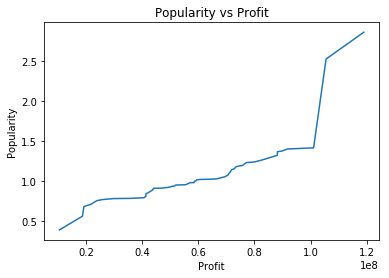

In [28]:
profit_list = list(md_new['profit'])
popularity_list = list(md_new['popularity'])
profit_list.sort()
popularity_list.sort()
plt.ylabel('Popularity')
plt.xlabel('Profit')
plt.title('Popularity vs Profit')
plt.plot(profit_list,popularity_list)

As popularity increases the profit also shows increase even though not in a uniform way.From this we understand that profit generated by a movie is dependant on it's popularity.                                                                
Popularity is proportional to the profit made by movie. 

In [29]:
#Function to plot average variations over time
def plot_avg(column):
    plt.plot(md_new[column],marker='o')
    plt.xlabel('Years')
    plt.xticks(np.arange(md['release_year'].min(),md['release_year'].max()+1,5))
    plt.ylabel(column+'(1e7)')
    plt.title(' Average '+column+ ' over the years')

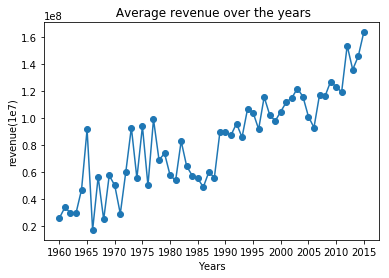

In [30]:
plot_avg('revenue')

The revenue generated has increased over the years, there is no general pattern of revenue generated but the revenue has increased. If you look at the revenue generated during the interval 1960-1965 and the interval 2010-2015 this is clearly visible.The year 1965 saw a huge growth in revenue and the next year was the year with least revenue.

We want to check how the profits have varied over time.

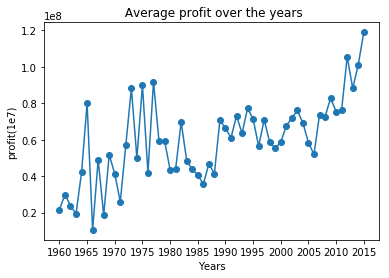

In [31]:
plot_avg('profit')

Even though there is no general pattern with profit variation over the years we can say that the years after 2006 had a regular increase in profits.There happened to be a huge growth in profit after 1963 to 1965 and a sudden dip in profit was found next year.The profits started to rise and fall continously and this trend followed till 1980.After 1980 profit growth/loss was not that big for each year.

In [32]:
print(md_new['profit'].idxmax())
print(md_new['profit'].idxmin())

2015
1966


We find that the year 2015 had maximum profit and year 1966 had minimum profit.

### __Movies with profit more than 20M __

In [33]:
profit_20 = md_tmdb[md_tmdb['profit']>=20000000] 
print('Number of movies with profit more than 20M- {}'.format(profit_20.shape[0]))

Number of movies with profit more than 20M- 1926


### __Number of movies for each actor__ ##

In [34]:
actor_count = extract_data('cast',md)
print(actor_count.head(10))

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Tom Hanks             34
Brad Pitt             34
Sylvester Stallone    34
Morgan Freeman        34
dtype: int64


## __ Bankable actors __ ##

In [35]:
actor_profit = extract_data('cast',profit_20)
print(actor_profit.head(10)) ##10 most profitable actors over the years

Tom Cruise            30
Brad Pitt             29
Tom Hanks             28
Robert De Niro        27
Bruce Willis          26
Samuel L. Jackson     25
Cameron Diaz          24
Sylvester Stallone    23
Johnny Depp           23
Eddie Murphy          23
dtype: int64


## Profitable movie companies

In [36]:
company_profit = extract_data('production_companies',profit_20)
print(company_profit.head(10))  ##10 most profitable companies

Universal Pictures                        212
Warner Bros.                              201
Paramount Pictures                        168
Twentieth Century Fox Film Corporation    147
Columbia Pictures                         118
New Line Cinema                            95
Walt Disney Pictures                       86
Relativity Media                           68
Touchstone Pictures                        63
Columbia Pictures Corporation              63
dtype: int64


 ### Movie genres with profit greater than 20M

Drama              756
Comedy             692
Action             600
Thriller           588
Adventure          471
Romance            316
Crime              310
Family             274
Science Fiction    270
Fantasy            235
Horror             215
Mystery            162
Animation          137
Music               68
History             66
War                 64
Western             20
Documentary          9
TV Movie             1
dtype: int64


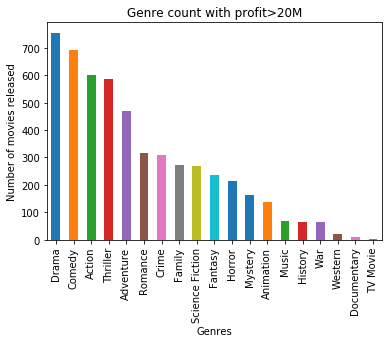

In [37]:
genre_profit = extract_data('genres',profit_20)
print(genre_profit)
plt.ylabel('Number of movies released')
plt.xlabel('Genres')
plt.title('Genre count with profit>20M')
genre_profit.plot.bar()

We find that the graph is similar to the graph we had plotted earlier. We also find that of the movies which had profit greater than 20M most of them were Drama or Comedy.Thus we can conclude without any doubt that over the time the most profitable and liked genres are Drama and Comedy.

# Conclusion #

I would like to wrap my analysis in the following way:
    * Over the years there has been a pattern for the runtime,revenue,popularity and profit generated.
    * Runtimes were mostly in between 107 & 109.
    * Revenues varied widely over the years but most of the revenues were between 0.8e+07 to 1.0e+08.
    * Popularity of movies released lately were comparitively higher than those released in the past,the popularity of movies has also increased over the years.
    * Both Revenue and Profit of movies has increased over time.
    * The most popular movies were of genres Drama and Comedy, most movies released were also of Drama and Comedy genres.
    * Movies starring actors Tom Cruise,Brad-pitt,Tom Hanks and a few others made huge profit.From this we can say that these actors have more fan base than the rest.
    * Universal Pictures and Warner Bros. saw high profits.
    * Of the movies which made huge profits most of them were of Drama and Comedy genres.
So there is a high chance of making profit if the movie is produced by Universal Pictures or Warner Bros. and has Tom Hanks or Tom Cruise or Brad-pitt and if the genres are drama and comedy.

# Limitations

* The chance of making high profits is not completely dependant on this as there are a lot of other factors and there may be many films of the actors not present in the dataset.
* The medium through which popularity was determined is unknown. This can impact the analysis as the limitations and bias inherent while gauging audience response will be present in the end values too.
* For finding relationship with profit we have taken only movies withprofit greater than 20M.
* We have many missing values of cast and production companies so we cannot conlude about the profitable companies and actors.
* There are movies of different languages in the dataset and the revenue each recieved is also dependent on the language and region the movie comes from. The unit of revenue has not been specified,assumed the revenue and budget to be in units of Dollars.